# DMP-02: Introduction to OOP
#### Author and Instructor:  Ashutosh Dave, FRM

## Agenda for today's session
#### Part 1: Intro to OOP concepts
- Dunders
- Intro to and advantages of OOP
- Class: Class-variables/attributes & class-methods
- Object/Instance: Instance-variables/attributes & instance-methods
- Static methods
- Inheritance
- Some useful functions
- The 'super' keyword
- Multiple inheritance

#### Part 2: Application of OOP in backtesting a trading strategy
- Example of backtesting a trading strategy in OOP format
- Using inheritance to create new/modify existing strategies
- Testing multiple strategies on the same stock
- Testing the same strategy on multiple stocks

## Approach for this session:
- Intuitive understanding of OOP concepts
- Practical implementation of OOP for quant trading/analysis
- Examples

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# Part 1: Intro to OOP concepts

## Dunders

- In-built methods/attributes with some special characteristics, 
- but for all practical purposes, you can treat them as normal methods/attributes only

In [2]:
a = 2

In [3]:
a + 2

4

In [4]:
# a+2 calls the following behind the scene
a.__add__(2)

4

In [5]:
b = [1,2,3]

In [6]:
len(b)

3

In [7]:
# len(b) utilizes the following behind the scene
b.__len__()

3

In [8]:
import numpy as np

In [9]:
#dir(np)

In [10]:
np.__version__
np.__package__

'1.22.4'

'numpy'

In [11]:
print(np.__doc__)
#dir(np)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularl

In [12]:
# When we try to create an object of a class, we need a constructor,
# which is the __init__ dunder method

## Intro to Object orientation

Object-orientation is a way of programming where we work by **defining a template of the generalized concept** of something along with its associated attributes and methods.

**We call this generalized concept a 'class'**, which is like a **template or blueprint** which can be used to create specific instances of that generalized concept. These **specific instances are called 'objects'.**

**Everything in Python is an 'object'.**

## Why use OOP?

- Get data and functions required for a task under one **systematic structure**
- Classes are **highly flexible**, so later on you can easily modify or build upon existing classes to extend your opertions
- **Leveraging existing code** saves time

In [13]:
# Python comes with some built-in classes, such as int, str, list, float, function etc.
# 2 objects of the 'float' class
a = 4.3
b = 3.2

type(a)
type(b)

float

float

In [14]:
#attribute/property linked to the class 'float'
a.imag

0.0

In [15]:
#method linked to the class 'float'
a.is_integer()

False

## Creating custom classes and objects

### Class: 
- class-attributes 
- class-methods

In [16]:
# Class variables/attributes and class-methods belong to the class itself and do not vary based on the instances
# However, it is possible to change a class variable for an object

In [17]:
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
        

In [18]:
# All instances of the class will have the class properties unless changed

# instantiating an object 'a'
a=student()
a.goal
a.print_goal()

# instantiating an object 'b'
b=student()
b.goal
b.print_goal()

'get educated'

get educated
learn, earn and enjoy!


'get educated'

get educated
learn, earn and enjoy!


In [19]:
# changing attribute value for b
b.goal='get educated plus get a job'
b.goal

'get educated plus get a job'

In [20]:
# changing method for b
def dough():
    return 'make_money!'
b.print_goal = dough 

b.print_goal()

'make_money!'

### Object/instance: 
 - instance-attributes 
 - instance-methods

In [21]:
# instance variables are owned by the instance/object of the class
# so they vary depending on the details of the specific objects

In [22]:
# instance methods can access unique data/variables of an instance/object
# instance methods are most common type of methods you will find in a class

In [23]:
# pay attention to the '__init__' constructor and the 'self' word

class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct different objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # instance method
        print('Total score is:',self.science+self.arts )
    

In [24]:
#object/instance of class 'dad' with specific characteristics
John = student(5,10)

In [25]:
John.total_score()

Total score is: 15


In [26]:
John.goal

'get educated'

In [27]:
# As John is an indtance of class 'student', the class attributes and class methods still hold
John.goal
John.print_goal()

'get educated'

get educated
learn, earn and enjoy!


In [28]:
# But John has some unique properties too specific to him!
#'self' has been replaced by the name of the object 'John' as seen below:
John.science
John.arts
John.total_score()

5

10

Total score is: 15


## Static methods

In [29]:
# instance methods pass 'self' as the first argument
# class methods pass 'cls' as the first argument
# static methods don't pass 'self' or 'cls', as static methods do not depend on or have access to any instance or class data
# they are just normal functions under the scope of a class

In [30]:
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # an instance method
        print('Total score is:',self.science+self.arts )
    
    @staticmethod
    def print_current_year(year): # a static method
        print('The current year is:',year)

In [31]:
student.print_current_year(2020)

The current year is: 2020


## Inheritance: subclasses/ child classes

In [32]:
# Inherit all the attributes and methods from the parent class and also add new functionality

In [33]:
# A subclass/child class of original class 'student'
class sporty_student(student):
    pass

In [34]:
sporty_student.goal

'get educated'

In [35]:
Jack= sporty_student(45, 35)

In [36]:
Jack.total_score()

Total score is: 80


In [37]:
help(sporty_student)

Help on class sporty_student in module __main__:

class sporty_student(student)
 |  sporty_student(science_marks, arts_marks)
 |  
 |  Method resolution order:
 |      sporty_student
 |      student
 |      builtins.object
 |  
 |  Methods inherited from student:
 |  
 |  __init__(self, science_marks, arts_marks)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  total_score(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from student:
 |  
 |  print_goal() from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from student:
 |  
 |  print_current_year(year)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from student:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (i

In [38]:
# Customizing the subclass
class sporty_student(student): 
    goal = 'get educated and win some trophies!'

In [39]:
Jack = sporty_student(4,9)

Jack.goal

'get educated and win some trophies!'

In [40]:
Jack.total_score()

Total score is: 13


## Some useful functionalities

In [41]:
# Some functions to check
#isinstance(Jack,student)
isinstance(Jack,sporty_student)

True

In [42]:
isinstance(Jack,student)

True

In [43]:
issubclass(sporty_student,student)

True

In [44]:
# __dict__  attribute gives complete details about the properties of any object (even a class is an object in Python) in
# the form of a mapping or dictionary
Jack.__dict__

{'science': 4, 'arts': 9}

In [45]:
# family tree
# The 'object' class is the primary ancestor of all classes
sporty_student.__mro__

(__main__.sporty_student, __main__.student, object)

## The 'super' keyword 

In [46]:
# Enjoy the best of both worlds. Overwrite/customize a method in child
#but at the same time access the properties from a method of same name from parent class using super()

In [47]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age # instance 
        print('I come from parent1 __init__')
        print('My age is:',self.age)

# a subclass with no __init__ of its own
class child(parent1):
    pass        


# instance of the subclass
jack = child(5)

I come from parent1 __init__
My age is: 5


In [48]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)

# A subclass with its own __init__        
class child(parent1):
    def __init__(self,grade):
        self.grade = grade
        print('I come from child __init__')  
        print('My grade is:',self.grade)

# instance of the subclass
jack = child('A')

I come from child __init__
My grade is: A


In [50]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)

        
# A subclass with its own __init__  but still accessing the __init__ of its parent as well     
class child(parent1):
    def __init__(self,grade, age):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        super().__init__(age)   # accessing the __init__ of parent using super()


# instance of the subclass
jack = child('A',5)

I come from child __init__
My grade is: A
I come from parent1 __init__
My age is: 5


## Multiple inheritance

In [51]:
# What if we have more than one parent classes?
# Then, we need to call the methods from parent classes explicitly if we want to access them

In [52]:
# parent class 1
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)
        
# parent class 2
class parent2():
    def __init__(self, gender):
        self.gender = gender
        print('I come from parent2 __init__')
        print('My gender is:',self.gender)
 
 # A child class with two parent classes and  with its own __init__  and instance attribute     
class child(parent1, parent2):
    def __init__(self,grade, age, gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly


# instance of the subclass
jack = child('A',5,'male')

I come from child __init__
My grade is: A
I come from parent1 __init__
My age is: 5
I come from parent2 __init__
My gender is: male


In [53]:
# The order is from left to right
child.__mro__

(__main__.child, __main__.parent1, __main__.parent2, object)

In [54]:
 # here we specify parent2 to the left of parent1    
class child(parent2, parent1):
    def __init__(self,grade,age,gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly
    

In [55]:
# The order is from left to right
child.__mro__

(__main__.child, __main__.parent2, __main__.parent1, object)

## Examples of popular built-in classes: list, dict, ndarray, DataFrame

In [56]:
list.__mro__

(list, object)

In [57]:
dict.__mro__

(dict, object)

In [58]:
import pandas as pd
import numpy as np
my_array = np.array([  np.arange(100,200,20), 
                    np.arange(600,700,20)])
my_array

array([[100, 120, 140, 160, 180],
       [600, 620, 640, 660, 680]])

In [59]:
type(my_array)

np.ndarray.__mro__

numpy.ndarray

(numpy.ndarray, object)

In [60]:
my_df = pd.DataFrame(my_array.T, columns=['A','B'])
my_df

,A,B
0,100,600
1,120,620
2,140,640
3,160,660
4,180,680


In [61]:
type(my_df)
# family tree of DataFrame
pd.core.frame.DataFrame.__mro__

pandas.core.frame.DataFrame

(pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

# Part 2: Application of OOP in backtesting a trading strategy

## Revision: Steps in Vectorized Backtesting of a Typical Strategy (As covered in previous session for DMP 01)
Strategy/Idea<br>
Data<br>
Indicators<br>
Signals<br>
Positions<br>
Returns<br>
Analysis

### Implementation using procedural programming ( A series of computational steps to be carried out)

In [62]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf

**Strategy/idea: Buy the Nifty 50 future if 10 day SMA exceeds 20 day SMA and sell if the 10 day SMA is below the 20 day SMA in the past 3 years.**


In [63]:
# Fetching data
# Create start and end dates for the past 252 days
end1 = pd.datetime.now().date()
start1 = end1-pd.Timedelta(days=3* 252)
end1
start1

datetime.date(2022, 6, 9)

datetime.date(2020, 5, 14)

In [64]:
ticker= ['^NSEI'] # the scrip for which we want the data
df = yf.download(ticker, start=start1, end=end1)
df3 =df.copy()

[*********************100%***********************]  1 of 1 completed


In [67]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-14,9213.950195,9281.099609,9119.750000,9142.750000,9142.750000,602600
2020-05-15,9182.400391,9182.400391,9050.000000,9136.849609,9136.849609,575900
2020-05-18,9158.299805,9158.299805,8806.750000,8823.250000,8823.250000,773000
2020-05-19,8961.700195,9030.349609,8855.299805,8879.099609,8879.099609,762200
2020-05-20,8889.150391,9093.799805,8875.349609,9066.549805,9066.549805,622300


In [68]:
#indicators
m = 10 # defining the shorter lookback period
n = 20 # defining the longer lookback period

df3['sma10'] = df3['Adj Close'].rolling(window=m, center=False).mean()
df3['sma20'] = df3['Adj Close'].rolling(window=n, center=False).mean()

df3['sma10_prev_day'] = df3['sma10'].shift(1)
df3['sma20_prev_day'] = df3['sma20'].shift(1)

df3.dropna(inplace=True)

In [69]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma10,sma20,sma10_prev_day,sma20_prev_day
Date,,,,,,,,,,
2020-06-12,9544.950195,9996.049805,9544.349609,9972.900391,9972.900391,796300,10024.320117,9585.442480,9985.060059,9543.934961
2020-06-15,9919.349609,9943.349609,9726.349609,9813.700195,9813.700195,716100,10023.075098,9619.285010,10024.320117,9585.442480
2020-06-16,10014.799805,10046.150391,9728.500000,9914.000000,9914.000000,899900,10016.565137,9673.822510,10023.075098,9619.285010
2020-06-17,9876.700195,10003.599609,9833.799805,9881.150391,9881.150391,685400,9998.525195,9723.925049,10016.565137,9673.822510
2020-06-18,9863.250000,10111.200195,9845.049805,10091.650391,10091.650391,622900,10004.780273,9775.180078,9998.525195,9723.925049
...,...,...,...,...,...,...,...,...,...,...
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000,16355.110254,16220.640088,16273.250293,16223.372607
2022-06-03,16761.650391,16793.849609,16567.900391,16584.300781,16584.300781,245500,16386.925293,16229.292627,16355.110254,16220.640088
2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600,16422.410352,16242.677686,16386.925293,16229.292627


In [70]:
#signals
df3['signal'] = np.where((df3['sma10'] > df3['sma20']) 
                        & (df3['sma10_prev_day'] < df3['sma20_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma10'] < df3['sma20']) 
                        & (df3['sma10_prev_day'] > df3['sma20_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()

 0    470
-1     13
 1     13
Name: signal, dtype: int64

In [71]:
#position
df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')

In [72]:
#returns calculation
# Buy and hold daily returns
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))

# Strategy returns 
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'checking if positions are generated properly')

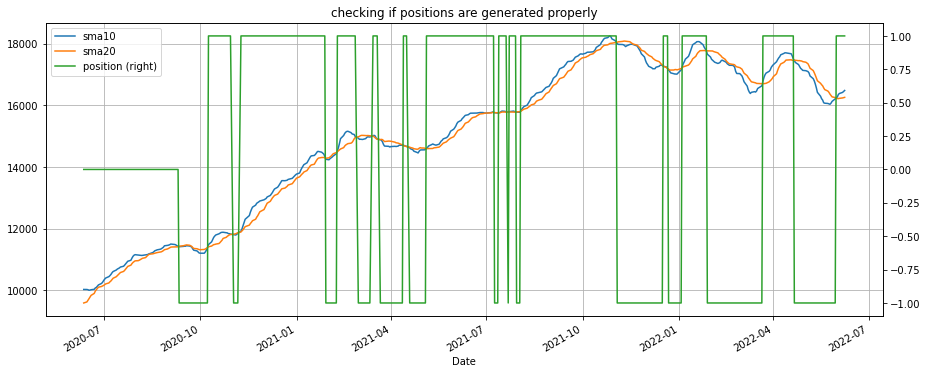

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, "Buy & hold' vs 'crossover strategy' cumulative returns")

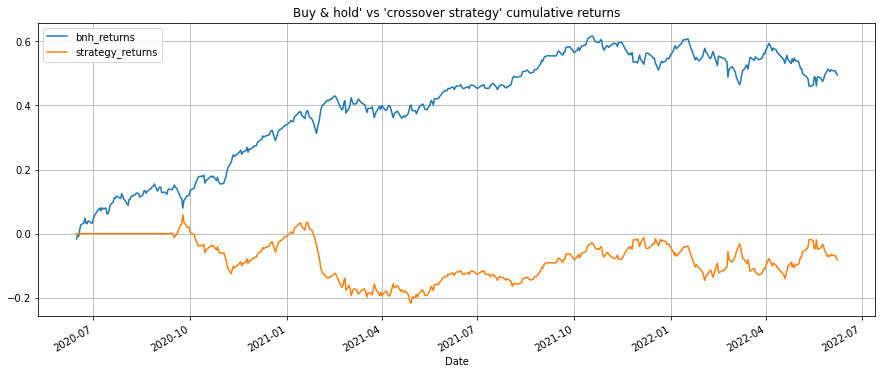

Start date,2020-06-12
End date,2022-06-08
Total months,23
,Backtest
Annual return,-5.277%
Cumulative returns,-10.122%
Annual volatility,16.139%
Sharpe ratio,-0.26
Calmar ratio,-0.21
Stability,0.16
Max drawdown,-24.84%


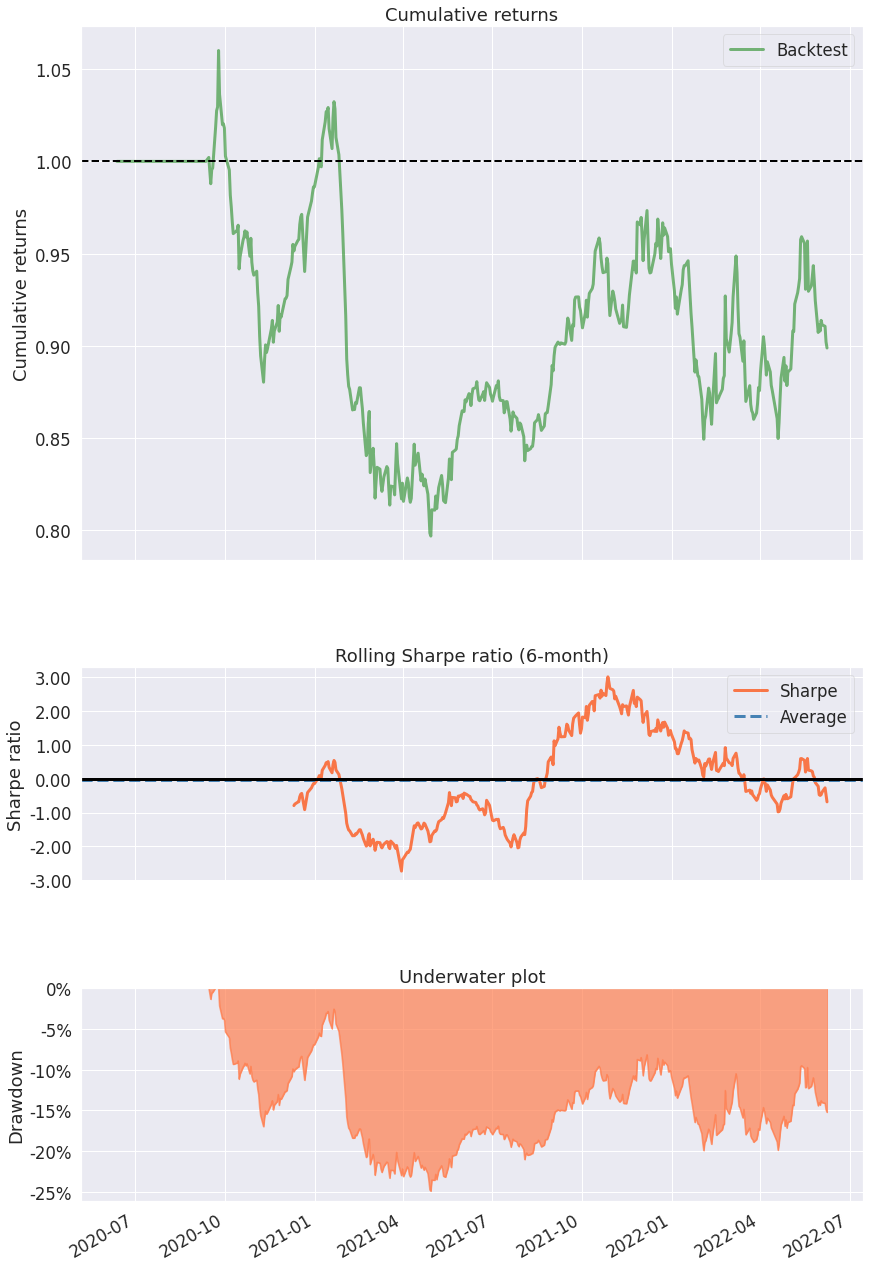

In [73]:
#Analysis
# A plot to check if the strategy is working as planned:
df3[['sma10','sma20', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
df3[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(df3['strategy_returns'])

## Implementing the above strategy using OOP

In [74]:
class backtesting_crossover:
    
    def __init__(self, ticker, start_date, end_date , ma_short, ma_long):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        #Call the basic methods in the __init__ constructor itself so that they are automatically executed upon object creation
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
        
        
    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)
        
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].rolling(window= self.ma_short, center=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].rolling(window= self.ma_long, center=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
   
    def signals(self):
        self.df['signal'] = np.where((self.df['ma_short'] > self.df['ma_long']) 
                            & (self.df['ma_short_prev'] < self.df['ma_long_prev']), 1, 0)
        
        self.df['signal'] = np.where((self.df['ma_short'] < self.df['ma_long']) 
                            & (self.df['ma_short_prev'] > self.df['ma_long_prev']), -1, self.df['signal'])
    
    def positions(self):
        self.df['position'] = self.df['signal'].replace(to_replace=0, method='ffill')
        
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )
        return self.df['strategy_returns'].cumsum()[-1]
       
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['ma_short','ma_long', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
        plt.show()

        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])

### Creating various instances/objects

Now that we have a blueprint of our strategy in the form of a class, we have much more flexibility in terms of what we want to backtest. We can conduct backtesting of different assets/stocks/indexes over different time intervals and for different values of MAs.

In [75]:
# Create start and end dates for the past 252 days
end1 = dt.datetime(2020,6,30).date()
start1 = end1-pd.Timedelta(days=3*252)
start1
end1

datetime.date(2018, 6, 5)

datetime.date(2020, 6, 30)

In [76]:
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=10 and ma_long=20
nifty_10_20 = backtesting_crossover('^NSEI', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.23316433565981898


In [77]:
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=5 and ma_long=20
nifty_5_20 = backtesting_crossover('^NSEI', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.20422027143079785


In [78]:
# performance of this strategy in Indian banking index over the same timeframe when ma_short=5 and ma_long=20
Banking_5_20 = backtesting_crossover('^NSEBANK', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.30940565148930005


In [79]:
# performance of this strategy in Indian IT index over the same timeframe when ma_short=5 and ma_long=20
IT_5_20 = backtesting_crossover('^CNXIT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.3171941980220466


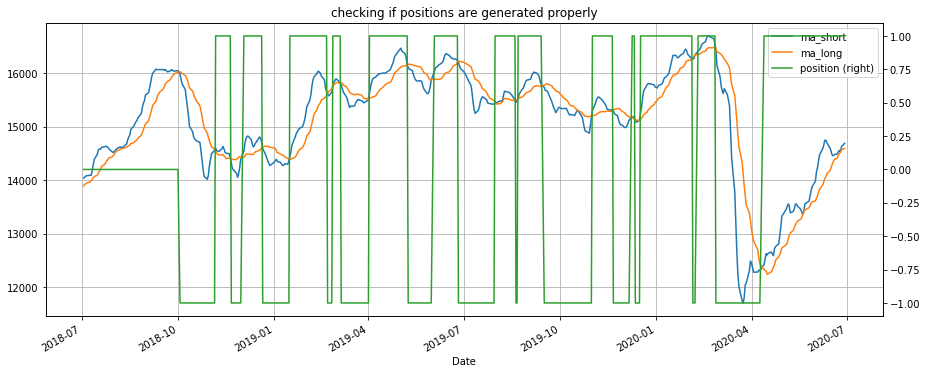

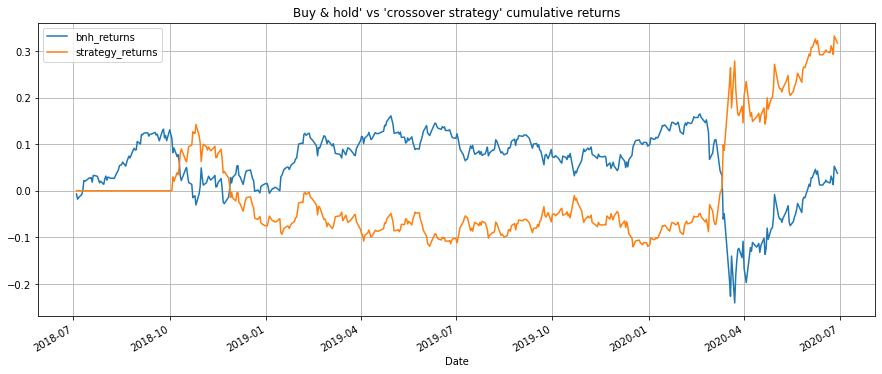

Start date,2018-07-03
End date,2020-06-29
Total months,22
,Backtest
Annual return,14.48%
Cumulative returns,29.449%
Annual volatility,25.015%
Sharpe ratio,0.67
Calmar ratio,0.59
Stability,0.06
Max drawdown,-24.362%


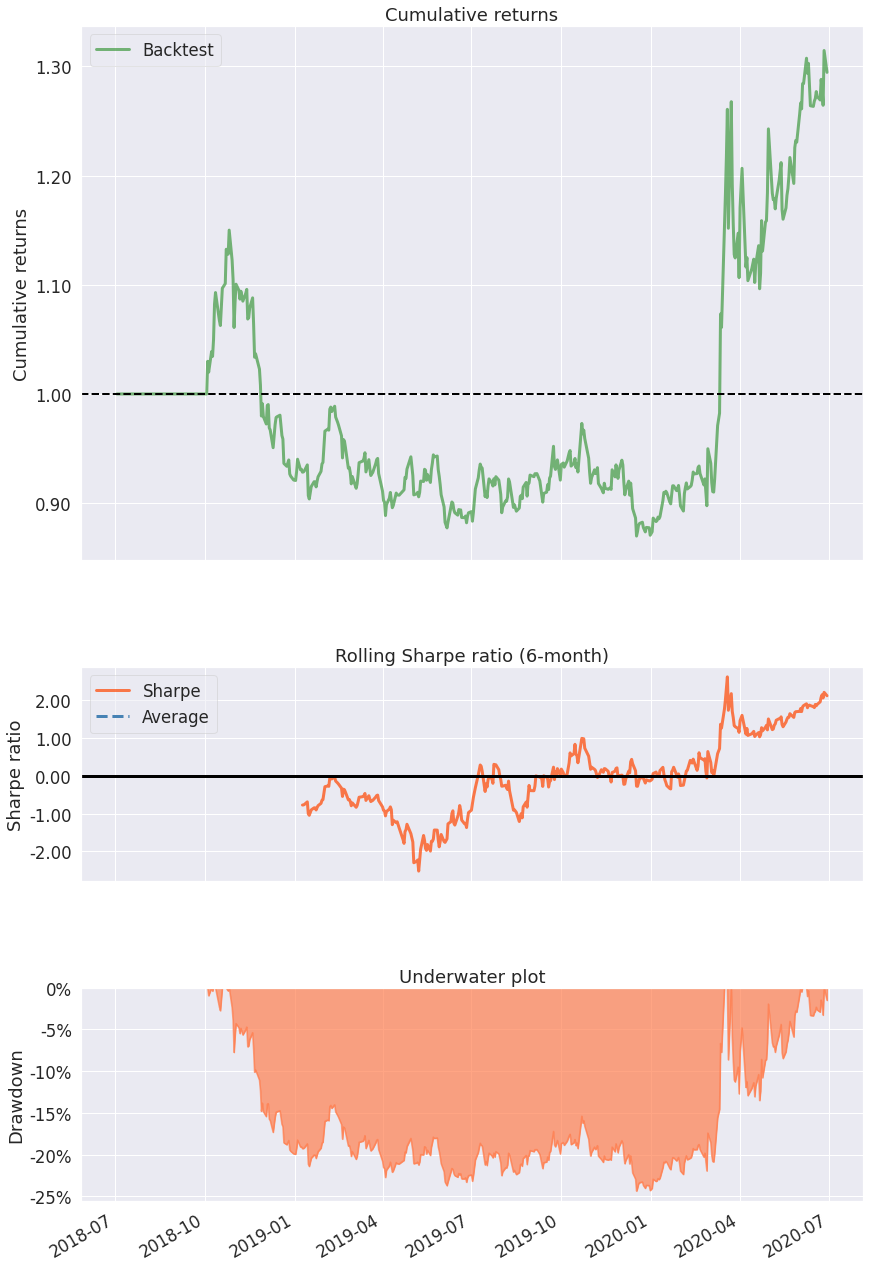

In [80]:
# for additional analysis, we can always call the analysis() function for any instance
IT_5_20.analysis()

In [81]:
microsoft_5_20 = backtesting_crossover('MSFT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.09218481004026066


In [82]:
microsoft_10_20 = backtesting_crossover('MSFT', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.30950030501205955


In [83]:
apple_10_20 = backtesting_crossover('AAPL', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.2748897262247143


In [84]:
apple_5_20 =  backtesting_crossover('AAPL', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.3321259629346298


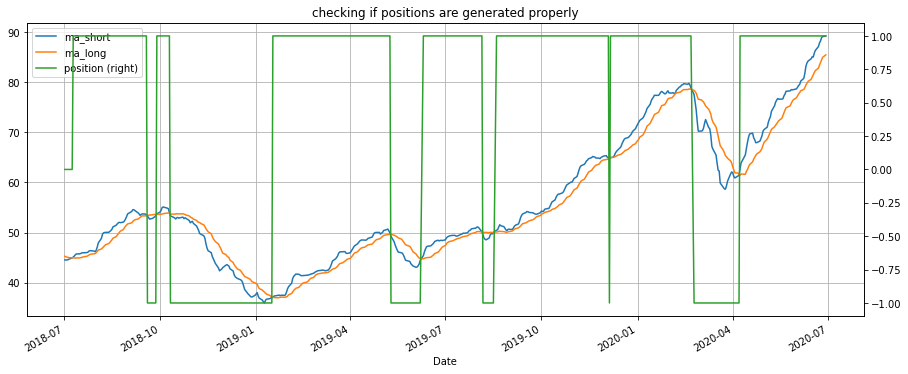

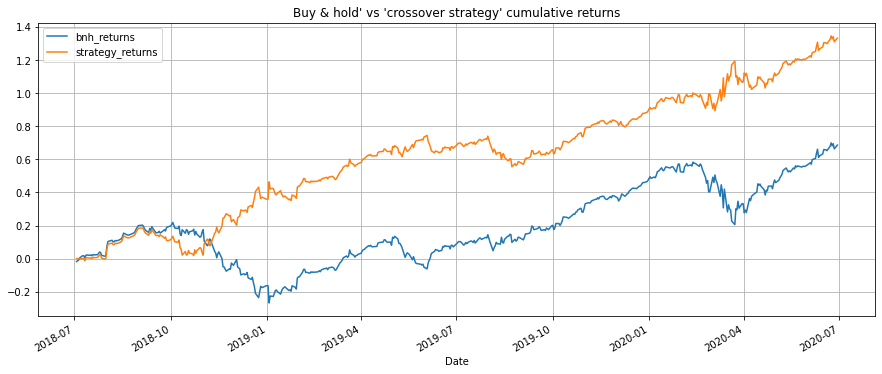

Start date,2018-07-02
End date,2020-06-29
Total months,23
,Backtest
Annual return,82.813%
Cumulative returns,232.609%
Annual volatility,36.106%
Sharpe ratio,1.86
Calmar ratio,4.60
Stability,0.94
Max drawdown,-18.004%


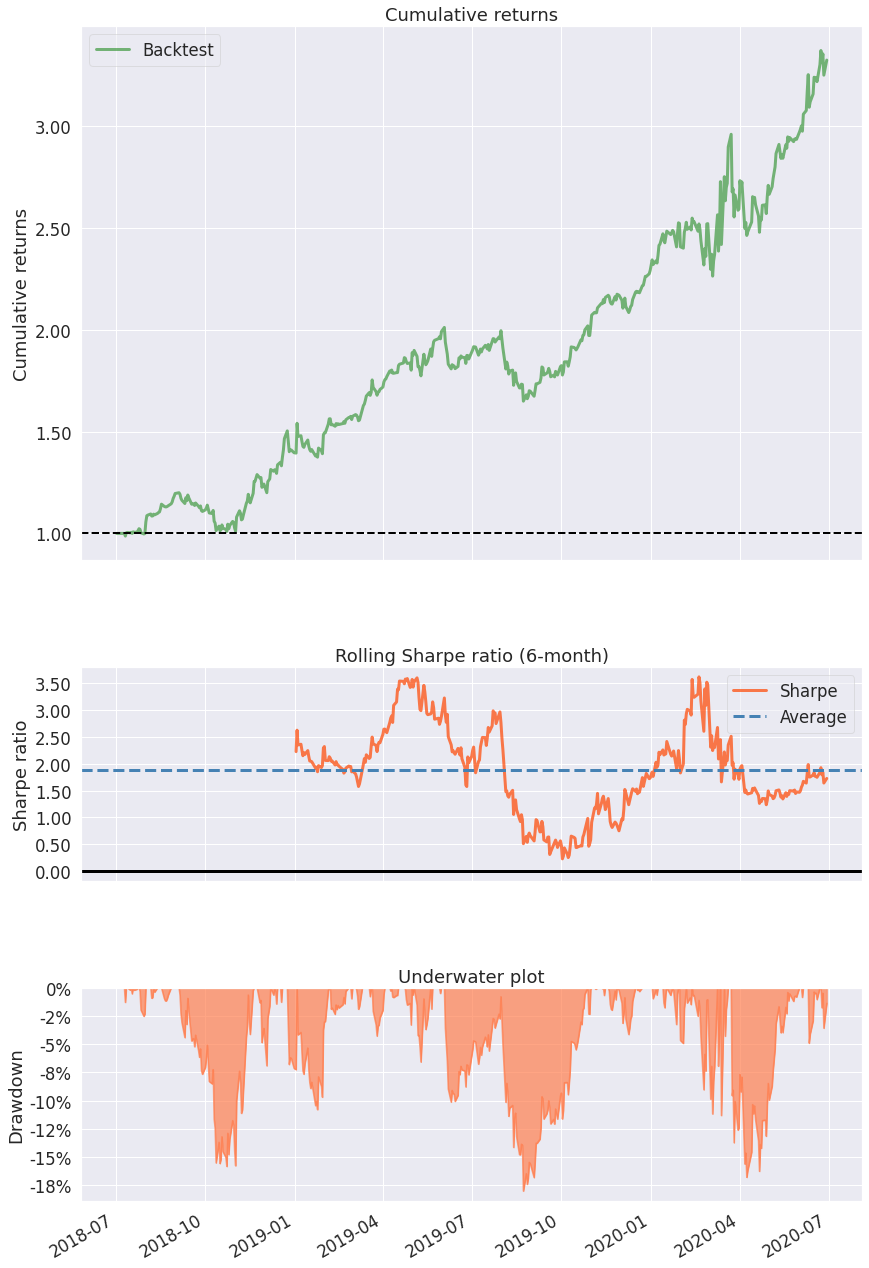

In [85]:
apple_5_20.analysis()

## Using inheritance, static methods & class methods to create new/modify existing strategies

In [ ]:
# We can always create new blueprints based on the existing blueprints
# Suppose now we want a class that backtests the crossover strategy but for exponential moving averages(EMA)
# We can make use of the code we wrote earlier on SMA and selectively tweak it

In [86]:
class backtesting_EMA_crossover(backtesting_crossover):
    
    #Simply define a new indicators method and get all other methods and properties from parent class
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].ewm(span= self.ma_short, adjust=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].ewm(span= self.ma_long, adjust=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
        
    # A static method
    @staticmethod
    def date_of_backtest():
        print('Date of backtest:',pd.datetime.now().date())
        
    # A class method
    @classmethod
    def about_this_backtest(cls):
        print('We are backtesting the short-long EMA crossover strategy.')

In [87]:
apple_10_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.0913431306974715


In [88]:
apple_5_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.2373911630547674


In [89]:
# calling the class method
apple_5_20_ema.about_this_backtest()

We are backtesting the short-long EMA crossover strategy.


In [90]:
# calling the static method
apple_5_20_ema.date_of_backtest()

Date of backtest: 2022-06-09


## Testing various strategies on the same asset/ Optimization

In [91]:
fast_ma_list =[5,10,15,20]
slow_ma_list =[25,50,100]

fast_ma=[]
slow_ma=[]
net_returns= []

for i in fast_ma_list:
    for j in slow_ma_list:
        print('For',i,j)
        a = backtesting_crossover('AAPL', start1, end1, i, j)
        fast_ma.append(i)
        slow_ma.append(j)
        net_returns.append(a.returns())

For 5 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.394314629215972
Total return: 1.394314629215972
For 5 50
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400039571796564
Total return: 1.0400039571796564
For 5 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.5571511150462022
Total return: 0.5571511150462022
For 10 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.1981160883015631
Total return: 1.1981160883015631
For 10 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.7859405644117028
Total return: 0.7859405644117028
For 10 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.17602272190484222
Total return: 0.17602272190484222
For 15 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.2820276907851447
Total return: 1.282

In [92]:
#Convert into a DataFrame
results = pd.DataFrame({'fast_ma':fast_ma,'slow_ma': slow_ma,'net_returns':net_returns})
results

,fast_ma,slow_ma,net_returns
0,5,25,1.394315
1,5,50,1.040004
2,5,100,0.557151
3,10,25,1.198116
4,10,50,0.785941
5,10,100,0.176023
6,15,25,1.282028
7,15,50,0.901324
8,15,100,0.329336
9,20,25,0.962121


In [93]:
# Sorting to find the best set of parameters
results.sort_values(by='net_returns',ascending=False)

,fast_ma,slow_ma,net_returns
0,5,25,1.394315
6,15,25,1.282028
3,10,25,1.198116
1,5,50,1.040004
9,20,25,0.962121
7,15,50,0.901324
4,10,50,0.785941
10,20,50,0.704283
2,5,100,0.557151
8,15,100,0.329336


## Testing the same strategy on various assets

In [94]:
stock_list = [   'BAJFINANCE.NS',
                 'BAJAJFINSV.NS',
                 'BPCL.NS',
                 'BHARTIARTL.NS',
                 'INDUSTOWER.NS',
                 'BRITANNIA.NS',
                 'CIPLA.NS',
                 'COALINDIA.NS',
                 'DRREDDY.NS',
                 'EICHERMOT.NS',
                 'GAIL.NS',
                 'GRASIM.NS'  ]

stock_name = []
net_returns = []

In [95]:
 for stock in stock_list:
        print('Backtesting result for',stock)
        a = backtesting_crossover(stock, start1, end1, 5, 25)
        stock_name.append(stock)
        net_returns.append(a.returns())

Backtesting result for BAJFINANCE.NS
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400563396103488
Total return: 1.0400563396103488
Backtesting result for BAJAJFINSV.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5289672071900458
Total return: 0.5289672071900458
Backtesting result for BPCL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.27088521131641513
Total return: -0.27088521131641513
Backtesting result for BHARTIARTL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.2908830406231008
Total return: -0.2908830406231008
Backtesting result for INDUSTOWER.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.44333621709974086
Total return: -0.44333621709974086
Backtesting result for BRITANNIA.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.584996987697671

In [96]:
#Convert into a DataFrame
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results

,Stock,net_returns
0,BAJFINANCE.NS,1.040056
1,BAJAJFINSV.NS,0.528967
2,BPCL.NS,-0.270885
3,BHARTIARTL.NS,-0.290883
4,INDUSTOWER.NS,-0.443336
5,BRITANNIA.NS,0.584997
6,CIPLA.NS,0.675578
7,COALINDIA.NS,-0.380775
8,DRREDDY.NS,-0.153981
9,EICHERMOT.NS,0.036342


In [97]:
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)

,Stock,net_returns
0,BAJFINANCE.NS,1.040056
6,CIPLA.NS,0.675578
5,BRITANNIA.NS,0.584997
1,BAJAJFINSV.NS,0.528967
11,GRASIM.NS,0.226807
9,EICHERMOT.NS,0.036342
8,DRREDDY.NS,-0.153981
2,BPCL.NS,-0.270885
3,BHARTIARTL.NS,-0.290883
7,COALINDIA.NS,-0.380775


## Homework 1:
- Create a class called 'four_wheeler' which has:
    - a class attribute: 'number_of_tyres' initialized to a value of 4.
    - three instance attributes: 'manufacturer', 'model' and  'color'.
    - an instance method which prints the details about the car based on the three instance attribute and the class attribute.<br><br>
    
- Create an instance of the above class with the following attributes:
    - 'manufacturer': 'BMW'
    - 'model': 5 series
    - 'color': Blue

## Homework 2:
- Implement the other strategies you have learnt in OOP format, for e.g., 
    - the Big Moves Monday strategy
    - Bollinger bands strategy
    - MACD strategy

## References

 - http://hilpisch.com/py4fi_oop_epat.html